In [1]:
import pandas as pd
import numpy as np
with open('C:/Users/WANGYIFAN/Desktop/film_data.csv') as f:
    df= pd.read_csv(f,header=0, delim_whitespace=False,na_values=0,index_col=False)
df=df.fillna(0)
df = df.sample(frac=1.0)  # 全部打乱


        
df.head(6)

     

,Color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1198,1.0,Danny DeVito,78.0,89.0,0.0,500.0,Amber Valletta,1000.0,9652000,Comedy,...,147,English,USA,3.0,40000000,2003,627.0,5.8,1.85,0.0
876,1.0,Quentin Tarantino,486.0,153.0,16000.0,11000.0,Brad Pitt,13000.0,120523073,Adventure|Drama|War,...,1527,English,USA,4.0,75000000,2009,11000.0,8.3,2.35,42000.0
612,1.0,Paul Greengrass,329.0,115.0,521.0,883.0,Edgar Ram铆rez,13000.0,227137090,Action|Mystery|Thriller,...,820,English,USA,3.0,110000000,2007,897.0,8.1,2.35,0.0
780,1.0,Rob Reiner,207.0,97.0,0.0,760.0,Noel Gugliemi,11000.0,93452056,Adventure|Comedy|Drama,...,310,English,USA,3.0,45000000,2007,2000.0,7.4,1.85,22000.0
1249,1.0,Nora Ephron,60.0,105.0,0.0,506.0,Michael Moore,975.0,10014234,Comedy|Crime,...,69,English,France,4.0,65000000,2000,909.0,5.0,1.85,177.0
1409,1.0,Nancy Meyers,241.0,121.0,278.0,808.0,Anne Hathaway,22000.0,75274748,Comedy|Drama,...,304,English,USA,3.0,35000000,2015,11000.0,7.2,1.85,54000.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#country
xc=np.array(df['country'])
xcnew=[]
for item in xc:
    if item=='USA':
        item=0
        
    else:
        item=1
    xcnew.append(item)
xcnew=np.array(xcnew)
print(xcnew)

[0 0 0 ..., 0 0 1]


In [4]:
#type of the movie
xg = np.array(df['genres'])
xaction = []
for item in xg:
    if 'Action' not in item:
        item = 0
    else:
        item = 1
    xaction.append(item)
xaction = np.array(xaction)
print(xaction)


xadventure = []
for item in xg:
    if 'Adventure' not in item:
        item = 0
    else:
        item = 1
    xadventure.append(item)
xadventure = np.array(xadventure)
print(xadventure)

xcomedy = []
for item in xg:
    if 'Comedy' not in item:
        item = 0
    else:
        item = 1
    xcomedy.append(item)
xcomedy = np.array(xcomedy)
print(xcomedy)

xfamily = []
for item in xg:
    if 'Family' not in item:
        item = 0
    else:
        item = 1
    xfamily.append(item)
xfamily = np.array(xfamily)
print(xfamily)

xcrime = []
for item in xg:
    if 'Crime' not in item:
        item = 0
    else:
        item = 1
    xcrime.append(item)
xcrime = np.array(xcrime)
print(xcrime)

xthriller = []
for item in xg:
    if 'Thriller' not in item and 'Horror' not in item and 'Mystery' not in item:
        item = 0
    else:
        item = 1
    xthriller.append(item)
xthriller = np.array(xthriller)
print(xthriller)

xfantasy = []
for item in xg:
    if 'Fantasy' not in item and 'Sci-Fi' not in item:
        item = 0
    else:
        item = 1
    xfantasy.append(item)
xfantasy = np.array(xfantasy)
print(xfantasy)

xbiography = []
for item in xg:
    if 'Biography' not in item and 'History' not in item and 'Documentary' not in item:
        item = 0
    else:
        item = 1
    xbiography.append(item)
xbiography = np.array(xbiography)
print(xbiography)


[0 0 1 ..., 1 0 0]
[0 1 0 ..., 0 0 0]
[1 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 1 1 0]
[0 0 1 ..., 1 1 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 1]


In [5]:
#language
xl=np.array(df['language'])
xlnew=[]
for item in xl:
    if item=='English':
        item=1
        
    else:
        item=0
    xlnew.append(item)
xlnew=np.array(xlnew)
print(xlnew)

[1 1 1 ..., 1 1 1]


In [49]:
#Xtrain=df[['Color','content_rating','budget','title_year','imdb_score']]
from sklearn.preprocessing import scale
X1=np.array(df[['Color','content_rating','title_year','imdb_score','cast_total_facebook_likes','num_voted_users','budget','actor_2_facebook_likes',
                'actor_1_facebook_likes','director_facebook_likes','num_critic_for_reviews','aspect_ratio']])

X=np.c_[X1,xcnew,xlnew,xaction,xadventure,xcomedy,xfamily,xcrime,xthriller,xfantasy,xbiography]
X = scale(X)

y=np.array(df['gross'])
#y=np.log10(y)

nt=2000

Xtr=X[:nt,:]
ytr=y[:nt]
Xts=X[nt:,:]
yts=y[nt:]
X.shape[1]

22

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(Xtr,ytr)
y_pred = regr.predict(Xts)

RSS_tr = np.mean((y_pred-yts)**2)/(np.std(yts)**2)
print("Normalized RSS = {0:f}".format(RSS_tr))
acc=np.mean(np.fabs((y_pred-yts)/yts<1))
print("Accuracy on test data = %f" % acc)

Normalized RSS = 0.395879
Accuracy on test data = 0.710938


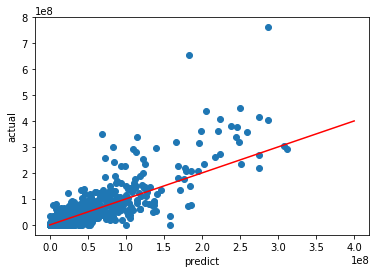

In [52]:
#plt.plot(yts,y_pred,'o')
plt.scatter(y_pred,yts)
plt.xlabel('predict')
plt.ylabel('actual')
plt.plot([0,4e8],[0,4e8],'r')

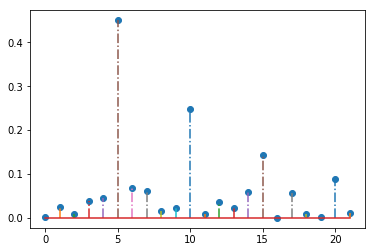

In [9]:
natt=X.shape[1]
ym = np.mean(ytr)
syy = np.mean((ytr-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(Xtr[:,k])
    sxy = np.mean((Xtr[:,k]-xm)*(ytr-ym))
    sxx = np.mean((Xtr[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    Rsq[k] = (sxy)**2/sxx/syy
plt.stem(Rsq, '-.')
plt.show()
#print("{0:2d} Rsq={1:f}".format(k,Rsq[k]))

In [44]:
d = 16 # Number of neurons to use
r=np.argsort(-Rsq)
Isel=r[:d]
print('The neurons with the ten highest R^2 values = ...',Isel[:10])


The neurons with the ten highest R^2 values = ... [ 5 10 15 20  6  7 14 17  4  3]


In [45]:
Xt=np.zeros((nt,d))
Xtss=np.zeros((719,d))
Xts.shape
for i in range(nt):
    for j in range(d):
        Xt[i][j]=Xtr[i][Isel[j]]
for i in range(719):
    for j in range(d):
        Xtss[i][j]=Xts[i][Isel[j]]
regr.fit(Xt,ytr)
y_pred = regr.predict(Xtss)
RSS_ts = np.mean((y_pred-yts)**2)/(np.std(yts)**2)
print("Normalized RSS = {0:f}".format(RSS_ts))
acc=np.mean(np.fabs((y_pred-yts)/yts<1))
print("Accuracy on test data = %f" % acc)

Normalized RSS = 0.398204
Accuracy on test data = 0.709473


Normalized RSS = 0.382022
Accuracy on test data = 0.698242


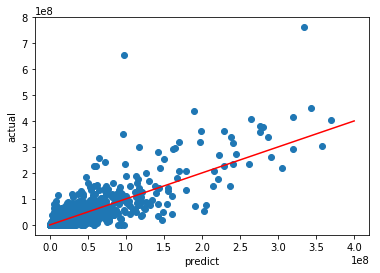

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor(3) 
knn.fit(Xtr, ytr) 
y_pred = knn.predict(Xts)
RSS_ts = np.mean((y_pred-yts)**2)/(np.std(yts)**2)
print("Normalized RSS = {0:f}".format(RSS_ts))
acc=np.mean(np.fabs((y_pred-yts)/yts<1))
print("Accuracy on test data = %f" % acc)
plt.scatter(y_pred,yts)
plt.xlabel('predict')
plt.ylabel('actual')
plt.plot([0,4e8],[0,4e8],'r')

In [59]:
knn.fit(Xt,ytr)
y_pred =knn.predict(Xtss)
RSS_ts = np.mean((y_pred-yts)**2)/(np.std(yts)**2)
print("Normalized RSS = {0:f}".format(RSS_ts))
acc=np.mean(np.fabs((y_pred-yts)/yts<1))
print("Accuracy on test data = %f" % acc)

Normalized RSS = 0.360300
Accuracy on test data = 0.701172


In [72]:

Xmean=np.mean(Xtr,axis=0)
Xstd=np.std(Xtr,axis=0)
Xtr_scale=(Xtr-Xmean[None,:])/Xstd[None,:]
Xts_scale=(Xts-Xmean[None,:])/Xstd[None,:]

In [73]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras import optimizers
K.clear_session()
nin = X.shape[1]  # dimension of input data
nh = 80    # number of hidden units
nout = 1   # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,),activation='relu', name='hidden'))
model.add(Dense(nout, activation=None, name='output'))
opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


In [74]:
model.fit(Xtr_scale, ytr, epochs=500, batch_size=100, validation_data=(Xts_scale,yts),verbose=False)

Text(0,0.5,'actual')

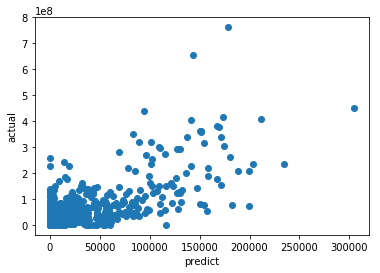

In [75]:
y_pred=model.predict(Xts_scale)
plt.plot(y_pred,yts,'o')

plt.xlabel('predict')
plt.ylabel('actual')
